In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris
from sklearn.linear_model import LinearRegression,Ridge, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score# 선형 모델(Linear Models)
from sklearn.model_selection import train_test_split

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [9]:
x_data1 = np.array( [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]] )
x_data = np.array( [1,2,3,4,5,6,7,8,9,10] ).reshape(-1,1)
y_data = np.array( [1,2,3,4,5,6,7,8,9,10] )

In [10]:
x_data.shape

(10, 1)

In [ ]:
# n행 1열: 행(데이터의갯수), 열(특성데이터의갯수)

In [11]:
model_lr = LinearRegression() #공식
#특성데이터 는 반드시(행렬(np 2차원), 데이터프레임)
model_lr.fit( x_data, y_data ) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model_lr.coef_ #w 값 (기울기)

array([1.])

In [14]:
model_lr.intercept_ #b값

0.0

In [16]:
carDF = pd.read_csv( 'data1/cars.csv')
carDF

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


In [20]:
carDF[['speed']]

,speed
0,4
1,4
2,7
3,7
4,8
5,9
6,10
7,10
8,10
9,11


In [21]:
carDF['dist']

0       2
1      10
2       4
3      22
4      16
5      10
6      18
7      26
8      34
9      17
10     28
11     14
12     20
13     24
14     28
15     26
16     34
17     34
18     46
19     26
20     36
21     60
22     80
23     20
24     26
25     54
26     32
27     40
28     32
29     40
30     50
31     42
32     56
33     76
34     84
35     36
36     46
37     68
38     32
39     48
40     52
41     56
42     64
43     66
44     54
45     70
46     92
47     93
48    120
49     85
Name: dist, dtype: int64

In [22]:
modelCar = LinearRegression()
modelCar.fit( carDF[['speed']], carDF['dist'] ) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
modelCar.coef_

array([3.93240876])

In [24]:
modelCar.intercept_

-17.57909489051095

In [26]:
# 자동차속도 15
modelCar.coef_[0]*15 + modelCar.intercept_

41.40703649635036

In [27]:
modelCar.predict( [[15]] ) #매트릭스(행렬): 행렬곱을 수행

array([41.4070365])

In [28]:
# 자동차속도 13, 15
modelCar.predict( [[13],[15]] )

array([33.54221898, 41.4070365 ])

In [29]:
x = np.array( [[1,2],[3,4]])
y = np.array( [[3,4],[5,6]] )
np.matmul(x, y) #x가반드시 행렬, y= 행렬

array([[13, 16],
       [29, 36]])

In [30]:
modelCar.predict(  carDF[['speed']] )

array([-1.84945985, -1.84945985,  9.94776642,  9.94776642, 13.88017518,
       17.81258394, 21.7449927 , 21.7449927 , 21.7449927 , 25.67740146,
       25.67740146, 29.60981022, 29.60981022, 29.60981022, 29.60981022,
       33.54221898, 33.54221898, 33.54221898, 33.54221898, 37.47462774,
       37.47462774, 37.47462774, 37.47462774, 41.4070365 , 41.4070365 ,
       41.4070365 , 45.33944526, 45.33944526, 49.27185401, 49.27185401,
       49.27185401, 53.20426277, 53.20426277, 53.20426277, 53.20426277,
       57.13667153, 57.13667153, 57.13667153, 61.06908029, 61.06908029,
       61.06908029, 61.06908029, 61.06908029, 68.93389781, 72.86630657,
       76.79871533, 76.79871533, 76.79871533, 76.79871533, 80.73112409])

In [31]:
 carDF[['speed']]

,speed
0,4
1,4
2,7
3,7
4,8
5,9
6,10
7,10
8,10
9,11


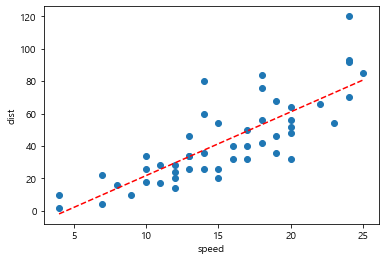

In [35]:
plt.xlabel('speed')
plt.ylabel('dist')
plt.scatter( carDF['speed'], carDF['dist'] )
plt.plot(  carDF['speed'], modelCar.predict(  carDF[['speed']] ),'r--' )
plt.show()

In [ ]:
electric.csv  w, b를 구하시고
전기생산량이 3.2, 4.5 인경우 전기 사용량을 예측하시요.
scatter(실제데이터), plot(예측데이터)를 그리시요.
10분정도 시간드리겠습니다.

In [38]:
elecDF = pd.read_csv('data4/electric.csv', index_col='Unnamed: 0')
elecDF

,전기생산량,전기사용량
0,3.52,2.48
1,2.58,2.27
2,3.31,2.47
3,4.07,2.77
4,4.62,2.98
5,3.98,3.05
6,4.29,3.18
7,4.83,3.46
8,3.71,3.03
9,4.61,3.25


In [39]:
modelElc = LinearRegression()
modelElc.fit(elecDF[['전기생산량']], elecDF['전기사용량'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
modelElc.coef_

array([0.49560324])

In [41]:
modelElc.intercept_

0.919581428068942

In [42]:
modelElc.predict( [ [3.2], [4.5] ] )

array([2.50551178, 3.14979599])

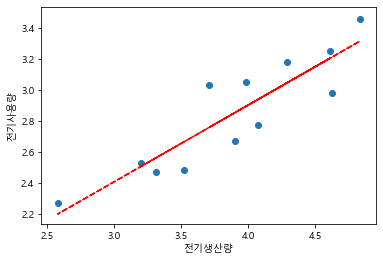

In [45]:
plt.scatter(elecDF['전기생산량'], elecDF['전기사용량'])
plt.plot(elecDF['전기생산량'], 
         modelElc.predict(elecDF[['전기생산량']]), 'r--')
plt.xlabel('전기생산량')
plt.ylabel('전기사용량')
plt.show()

* 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용

<h1>
$ SSR( 예측값- 평균값)^2 의합$ <br>
$ SST( 실제값- 평균값)^2 의합$ <br>
$ SSE( 실제값- 예측값)^2 의합$ <br>
$ R^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST}   $
</h1>

결정 계수 (Coefficient of determination, <br>
R 제곱 (R^2, R-squared, 피어슨 상관 계수의 제곱))<br>
 1 - (오차의 제곱합)/(편차의 제곱합)<br>
오차는 실제 값과 예측 값의 차이<br>
편차는 실제 값과 평균 값의 차이<br>
0 <= 결정 계수 <= 1 (0이면 0점, 1이면 100점)<br>
높을 수록 좋음<br>

from sklearn.metrics import r2_score<br>
y_predict = model.predict( x_data )<br>
r2_score( y_data, y_predict )<br>

In [52]:
modelCar.score( carDF[['speed']], carDF.dist )

0.6510793807582509

In [54]:
from sklearn.metrics import r2_score
y_predict = modelCar.predict( carDF[['speed']] )
r2_score( carDF.dist , y_predict )

0.6510793807582509

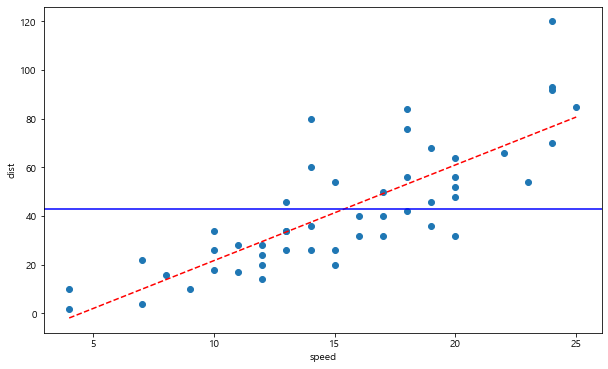

In [48]:
plt.figure( figsize=(10,6))
plt.xlabel('speed')
plt.ylabel('dist')
predictions =modelCar.predict(  carDF[['speed']] )
plt.scatter(carDF.speed, carDF.dist)
plt.plot( carDF.speed, predictions, 'r--') 
plt.axhline( carDF.dist.mean(),color='blue')
plt.show()

In [50]:
carDF.dist.mean()

42.98

In [49]:
predictions

array([-1.84945985, -1.84945985,  9.94776642,  9.94776642, 13.88017518,
       17.81258394, 21.7449927 , 21.7449927 , 21.7449927 , 25.67740146,
       25.67740146, 29.60981022, 29.60981022, 29.60981022, 29.60981022,
       33.54221898, 33.54221898, 33.54221898, 33.54221898, 37.47462774,
       37.47462774, 37.47462774, 37.47462774, 41.4070365 , 41.4070365 ,
       41.4070365 , 45.33944526, 45.33944526, 49.27185401, 49.27185401,
       49.27185401, 53.20426277, 53.20426277, 53.20426277, 53.20426277,
       57.13667153, 57.13667153, 57.13667153, 61.06908029, 61.06908029,
       61.06908029, 61.06908029, 61.06908029, 68.93389781, 72.86630657,
       76.79871533, 76.79871533, 76.79871533, 76.79871533, 80.73112409])

# 학습을 통한 선형회귀

In [56]:
# alpha=0.0001 (런닝레이트)
# max_iter=1000 (학습횟수)
#early_stopping=False, (cost 값이 변화가없다.. 학습이되어 최저점에도닥)
modelSGD = SGDRegressor(max_iter=100, alpha=0.0001, 
                        early_stopping=True, verbose=1 )
modelSGD.fit( carDF[['speed']], carDF['dist'] )

-- Epoch 1
Norm: 4.21, NNZs: 1, Bias: -0.253699, T: 45, Avg. loss: 891.568641
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.62, NNZs: 1, Bias: -0.664086, T: 90, Avg. loss: 286.191501
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.42, NNZs: 1, Bias: -0.959631, T: 135, Avg. loss: 335.138737
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.53, NNZs: 1, Bias: -1.251840, T: 180, Avg. loss: 225.459581
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.71, NNZs: 1, Bias: -1.431598, T: 225, Avg. loss: 174.469858
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.84, NNZs: 1, Bias: -1.632792, T: 270, Avg. loss: 227.371427
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.82, NNZs: 1, Bias: -1.902481, T: 315, Avg. loss: 189.425280
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.67, NNZs: 1, Bias: -2.058913, T: 360, Avg. loss: 231.899356
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 3.91, NNZs: 1, Bias: -2.169689, T: 405, Avg. loss: 172.474503
Total train

SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [57]:
modelSGD.coef_

array([3.1500142])

In [58]:
modelSGD.intercept_

array([-2.91561954])

# 딥러닝을 이용한 선형회귀

In [63]:
#hidden_layer_sizes=(크기,출력갯수,히든레이어갯수)
modelNN = MLPRegressor(max_iter=5000, alpha=0.1,verbose=1,
                      hidden_layer_sizes=(100,10) )
modelNN.fit( carDF[['speed']], carDF['dist'] )

Iteration 1, loss = 1243.68501811
Iteration 2, loss = 1227.28964520
Iteration 3, loss = 1215.71080927
Iteration 4, loss = 1206.07024580
Iteration 5, loss = 1196.45493608
Iteration 6, loss = 1186.95585278
Iteration 7, loss = 1178.60044397
Iteration 8, loss = 1170.49708848
Iteration 9, loss = 1162.37883831
Iteration 10, loss = 1154.24259885
Iteration 11, loss = 1146.08746542
Iteration 12, loss = 1137.90444721
Iteration 13, loss = 1129.69770773
Iteration 14, loss = 1121.47018884
Iteration 15, loss = 1113.21368948
Iteration 16, loss = 1104.94748952
Iteration 17, loss = 1096.67041093
Iteration 18, loss = 1088.38151634
Iteration 19, loss = 1080.08022021
Iteration 20, loss = 1071.76650790
Iteration 21, loss = 1063.43981711
Iteration 22, loss = 1055.09675561
Iteration 23, loss = 1046.73920908
Iteration 24, loss = 1038.36798395
Iteration 25, loss = 1029.99672553
Iteration 26, loss = 1021.75883214
Iteration 27, loss = 1014.20458874
Iteration 28, loss = 1007.09511774
Iteration 29, loss = 999.9696

Iteration 297, loss = 128.84163465
Iteration 298, loss = 128.80066788
Iteration 299, loss = 128.76055745
Iteration 300, loss = 128.71616365
Iteration 301, loss = 128.67452633
Iteration 302, loss = 128.63353748
Iteration 303, loss = 128.59235558
Iteration 304, loss = 128.55076626
Iteration 305, loss = 128.50921454
Iteration 306, loss = 128.46638272
Iteration 307, loss = 128.42272321
Iteration 308, loss = 128.37900283
Iteration 309, loss = 128.33823725
Iteration 310, loss = 128.29240854
Iteration 311, loss = 128.25001961
Iteration 312, loss = 128.16521882
Iteration 313, loss = 128.14034831
Iteration 314, loss = 128.06886581
Iteration 315, loss = 128.03209457
Iteration 316, loss = 127.99144801
Iteration 317, loss = 127.93624086
Iteration 318, loss = 127.87738230
Iteration 319, loss = 127.81376322
Iteration 320, loss = 127.74530773
Iteration 321, loss = 127.67350781
Iteration 322, loss = 127.59857347
Iteration 323, loss = 127.52318890
Iteration 324, loss = 127.55967276
Iteration 325, loss 

Iteration 598, loss = 113.23025651
Iteration 599, loss = 113.21791594
Iteration 600, loss = 113.20796058
Iteration 601, loss = 113.19599351
Iteration 602, loss = 113.18347092
Iteration 603, loss = 113.17298782
Iteration 604, loss = 113.16113362
Iteration 605, loss = 113.14597786
Iteration 606, loss = 113.12583399
Iteration 607, loss = 113.10678353
Iteration 608, loss = 113.10837012
Iteration 609, loss = 113.09916829
Iteration 610, loss = 113.07263540
Iteration 611, loss = 113.05869937
Iteration 612, loss = 113.05263597
Iteration 613, loss = 113.04704964
Iteration 614, loss = 113.04021896
Iteration 615, loss = 113.03047709
Iteration 616, loss = 113.01963739
Iteration 617, loss = 113.00709503
Iteration 618, loss = 112.99177915
Iteration 619, loss = 112.97693625
Iteration 620, loss = 112.96689722
Iteration 621, loss = 112.95242249
Iteration 622, loss = 112.94776585
Iteration 623, loss = 112.94064077
Iteration 624, loss = 112.92579509
Iteration 625, loss = 112.91809605
Iteration 626, loss 

Iteration 895, loss = 111.26712938
Iteration 896, loss = 111.25840329
Iteration 897, loss = 111.25972923
Iteration 898, loss = 111.25112747
Iteration 899, loss = 111.25484428
Iteration 900, loss = 111.25087386
Iteration 901, loss = 111.24252190
Iteration 902, loss = 111.24058954
Iteration 903, loss = 111.24116766
Iteration 904, loss = 111.23485484
Iteration 905, loss = 111.23198140
Iteration 906, loss = 111.22872392
Iteration 907, loss = 111.22511424
Iteration 908, loss = 111.22483156
Iteration 909, loss = 111.22137756
Iteration 910, loss = 111.21169698
Iteration 911, loss = 111.21482922
Iteration 912, loss = 111.20937507
Iteration 913, loss = 111.20553486
Iteration 914, loss = 111.20208170
Iteration 915, loss = 111.20136256
Iteration 916, loss = 111.19537303
Iteration 917, loss = 111.19319493
Iteration 918, loss = 111.19002732
Iteration 919, loss = 111.18946042
Iteration 920, loss = 111.18453760
Iteration 921, loss = 111.17966192
Iteration 922, loss = 111.17723412
Iteration 923, loss 

Iteration 1183, loss = 110.77363341
Iteration 1184, loss = 110.75853588
Iteration 1185, loss = 110.75695110
Iteration 1186, loss = 110.76712539
Iteration 1187, loss = 110.77149944
Iteration 1188, loss = 110.76631614
Iteration 1189, loss = 110.75503923
Iteration 1190, loss = 110.75558783
Iteration 1191, loss = 110.75537718
Iteration 1192, loss = 110.74722076
Iteration 1193, loss = 110.75269576
Iteration 1194, loss = 110.75092094
Iteration 1195, loss = 110.74264435
Iteration 1196, loss = 110.73902176
Iteration 1197, loss = 110.74295171
Iteration 1198, loss = 110.73421757
Iteration 1199, loss = 110.73355892
Iteration 1200, loss = 110.73416788
Iteration 1201, loss = 110.73519706
Iteration 1202, loss = 110.73468944
Iteration 1203, loss = 110.73715975
Iteration 1204, loss = 110.73213116
Iteration 1205, loss = 110.73154224
Iteration 1206, loss = 110.72838250
Iteration 1207, loss = 110.72683770
Iteration 1208, loss = 110.73055117
Iteration 1209, loss = 110.72674552
Iteration 1210, loss = 110.7

Iteration 1451, loss = 110.51881627
Iteration 1452, loss = 110.51800449
Iteration 1453, loss = 110.51491149
Iteration 1454, loss = 110.51603909
Iteration 1455, loss = 110.51960704
Iteration 1456, loss = 110.52180520
Iteration 1457, loss = 110.51702932
Iteration 1458, loss = 110.51062765
Iteration 1459, loss = 110.51515872
Iteration 1460, loss = 110.51134860
Iteration 1461, loss = 110.51211787
Iteration 1462, loss = 110.51277805
Iteration 1463, loss = 110.51536752
Iteration 1464, loss = 110.51559123
Iteration 1465, loss = 110.50874303
Iteration 1466, loss = 110.50103384
Iteration 1467, loss = 110.52021507
Iteration 1468, loss = 110.51830456
Iteration 1469, loss = 110.50086507
Iteration 1470, loss = 110.51220643
Iteration 1471, loss = 110.51716972
Iteration 1472, loss = 110.52266917
Iteration 1473, loss = 110.52437003
Iteration 1474, loss = 110.52593259
Iteration 1475, loss = 110.51806398
Iteration 1476, loss = 110.51109274
Iteration 1477, loss = 110.50085646
Iteration 1478, loss = 110.4

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=5000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [60]:
modelNN.coefs_

[array([[ 9.83588032e-02,  3.34344540e-01,  3.34086924e-01,
          1.51985050e-01, -1.08539477e-01,  1.37828098e-01,
         -4.35929752e-02, -8.29098101e-02, -9.64157669e-02,
          1.82430111e-01, -7.57607484e-02,  2.22989021e-01,
          7.16895592e-04,  1.30928034e-01, -7.73005964e-02,
          1.60741954e-01,  1.11805471e-01,  2.69271811e-01,
         -7.75574253e-03, -3.82142644e-02, -8.32416770e-02,
          1.13027443e-01,  2.11061803e-01, -9.57645900e-02,
          4.17543150e-02, -4.20253867e-02, -3.94489138e-03,
          1.29616048e-01,  7.60103754e-02,  1.17435715e-01,
          5.88481453e-02, -9.65740665e-03, -1.15405431e-01,
         -1.15004879e-02, -5.26045692e-02, -2.80134975e-05,
         -1.95477847e-02,  5.27404654e-02, -2.14228856e-03,
          2.80924450e-01,  2.32032760e-01, -8.71618229e-02,
          3.30948882e-01,  2.02964325e-01, -1.01532580e-01,
         -8.99405720e-03, -4.10717361e-02, -9.93903605e-02,
          1.96210953e-01, -1.03411052e-0

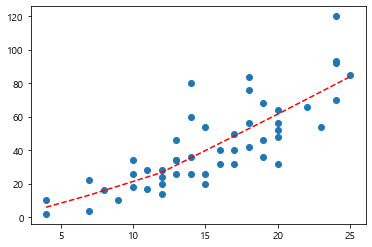

In [64]:
plt.scatter(  carDF['speed'], carDF['dist'])
plt.plot(  carDF['speed'], modelNN.predict( carDF[['speed']] ) , 'r--')
plt.show()